In [2]:
import numpy as np
import math 
from matplotlib import pyplot as plt
from scipy.stats import poisson
from scipy.optimize import differential_evolution, least_squares, Bounds
import seaborn as sns

sns.set_style(style="whitegrid")

# Quant Tests

## Problem 1. 

A person rolls four six-faced dices, denote the sum as X. What is the probability that $13 <= X <= 15$?

## Solution 1. Simulation

In [7]:
rng = np.random.default_rng(42)

size = 100000
sums = np.zeros(size)

for i in range(size): 
    draw = rng.uniform(1, 7, 4)
    draw_int = np.floor(draw)  # Ensure we have integers
    sums[i] = np.sum(draw_int)

condition1 = sums >= 13 
condition2 = sums <=15
filtered_sums = sums[condition1 & condition2]

p = len(filtered_sums) / size
p


0.32916

## Solution 2. Theoretical probability. 

The combinations of 4 dices that sum up to 13 are

Comb#1: 1, 1, 5, 6

Comb#2: 1, 2, 5, 5, 

Comb#3: 1, 2, 4, 6

The counts for combination #1 to happen is Permutations $\dfrac{4!}{2!} = 12$.

The counts for combination #2 to happen is Permutation $4! = 24$. 

Adds up all the conunts and divided by the total number of possibilities $6^4$

## Problem 2

### Question 

Suppose we estimate the probability of Sweden to win a football match
with 2-1 to be p1 and, given that Sweden scores a goal, the probability
that the star player scored it is p2. What is the probability that Sweden
wins with 2-1 and the star player scored the first goal of the match?

### Answer

p1 * p2

#### Take 1
##### Step1

statement "Given that Sweden scores a goal, the probability that the star player scored it is p2"

Q1. If Sweden scores two goals, what is the probability that the star player scores the first goal?

P(star player scored both goals) + P(star player scored first goal but not the second one)  

p2 * p2 + p2 * (1-p2) = p2

##### Step2

Q2. What is the probability that Sweden wins with 2-1 and the star player scored the first goal of the match?

p1 * p2


### Take 2

We are asked to find the probabiity of "Sweden wins a match with 2-1" and "The probability of the star player scored the goal of **the** match". 

1. The probability can be broken down into 
   
   P(Sweden wins a match with 2-1) and P(Sweden scores the first goal of the match | Sweden wins a match with 2-1) and P(The star player scores the goal | Sweden scores the first goal of the match). 

2. Looking at the second part "P(Sweden scores the first goal of the match | Sweden wins a match with 2-1)"
   
   P(A) Sweden scores the first goal of a match with a result of 2-1 that Sweden wins
   
   P(B) Sweden wins a match with 2-1 

   To figure out P(A), three possible outcomes are 
   
   SWE - SWE - OPP
   
   SWE - OPP - SWE
   
   OPP - SWE - SWE
   
   If we assume those three outcomes are equally likely to happen, (the assumption might be **false, why? motivate**)

   P(Sweden scores the first goal of the match | Sweden wins a match with 2-1) = 2/3 * p1. 



## Problem 3

### Question

Estimate roughly the probability of a full-time draw in an even basketball game with 200 in expected points, motivate!

### Take 1. 

1. Assume the total points a team gets from a basketball match follows a normal distribution

$X_1 \sim N(\mu_1, \sigma_1^2)$

$X_2 \sim N(\mu_2, \sigma_2^2)$

$X_1 + X_2 \sim N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$


2. The probability of a draw match is P(99.5 < X1 < 100.5) * P(99.5 < x2 < 100.5)

3. function Z takes a z-score and finds the probability under the normal distribution

$P(99.5 < X_1 < 100.5) = Z(\frac{100.5 - \mu1}{\sigma1}) - Z(\frac{99.5 - \mu1}{\sigma1})$ 

$P(99.5 < X_2 < 100.5) = Z(\frac{[100.5 - (200-\mu1)]}{\sigma2}) - Z(\frac{[99.5 - (200-\mu1)]}{\sigma2})$ 



### Take 2. 

1. In a draw scenario, each team is expected to score 100 points. 
2. Model basket ball game score using Poisson distribution. Expected value $\lambda$ = 100, and variance $\lambda$ = 100. As basketball games have large numbers, we can use Normal distribution to approximate the Poisson distribution. 

$X_1 \sim N(\mu_1 = 100, \sigma_1^2=100)$

$X_2 \sim N(\mu_2 = 100, \sigma_2^2=100)$


3. The difference of scores between two teams can be modeled as D

$D = X_1 - X2$

$D \sim N(\mu_3 = 100 - 100, \sigma_3^2=100+100)$

$D \sim N(\mu_3 = 0, \sigma_3=14.14)$

4. The PDF for a normal distribution is 
$f(x) = \dfrac{1}{\sigma \sqrt{2\pi}}e^{-\dfrac{(x-u)^2}{2\sigma^2}}$

solve for x = 0, mu = 0

f(x) = 0.028

5. As PDF is continous function, while basketball game scores are discrete. We approximate the probability by multiplying f(x=0) by 1 (1 unit is 1 score)

prob = 0.028 * 1 = 0.028 = 2.8%



### Take 3. Simulation

In [24]:
p1 = np.random.poisson(100, size=100000)

bool_100pts = p1 == 100

count_100pts = np.sum(bool_100pts)

count_100pts

np.int64(3955)

## Problem 4

Using any programming language, find $\lambda_1, \lambda_2, \lambda_3, \lambda_4$ such that: 

$ X_n ~ Poisson(\lambda_n) $

$ P(X_n > X_{n+1}) = 0.55, \forall n \in \{1, 2, 3\} $

$ P(X_4 > X_{1}) = 0.05 $


### Step1. 
Define a function to find Poisson(lambda1) > Poisson(lambda2)

$P(X_1 > X_2) = \Sigma_{k=0}^\infty P(X_1 > k) \cdot P(X_2 = k)$

$ \qquad \qquad \qquad = \Sigma_{k=0}^\infty [1 - P(X_1 <= k)] \cdot P(X_2 = k)$

$P(X_2 = k) $ is the pmf of poisson distribution with lambda2

$P(X_1 <= k) $ is the cdf of poisson distribution with lambda1

In [28]:
def prob_x1_gt_x2(lambda1, lambda2): 
    max_k = int(lambda1 * 3)
    probs = 0.0
    for k in range(max_k + 1):
        p_x1 = poisson.cdf(k, lambda1)
        p_x2 = poisson.pmf(k, lambda2)
        p_x1_gt_x2 = (1 - p_x1) * p_x2
        probs += p_x1_gt_x2

    return probs

In [9]:
prob_x1_gt_x2(5, 2)

np.float64(0.8314310864698599)

### Step2. 

The problem can be rephrased into an optimization problem to minize the following objective function

$ obj\_f1 = P(X_1 > X_2) - 0.55 = 0 $

$ obj\_f2 = P(X_2 > X_3) - 0.55 = 0 $

$ obj\_f3 = P(X_3 > X_4) - 0.55 = 0 $

$ obj\_f4 = P(X_4 > X_1) - 0.05 = 0 $

objective_function = SSE(obj\_f1 + obj\_f1+ obj\_f1+ obj\_f1)



In [10]:
def objective_function(lambdas):
    lambda1, lambda2, lambda3, lambda4 = lambdas
    objective_func = (prob_x1_gt_x2(lambda1, lambda2) - 0.55) **2 \
                    + (prob_x1_gt_x2(lambda2, lambda3) - 0.55) **2 \
                    + (prob_x1_gt_x2(lambda3, lambda4) - 0.55) **2 \
                    + (prob_x1_gt_x2(lambda4, lambda1) - 0.05) **2
    return objective_func

### Step 3a. Optimization
Selection of optimization method

In [16]:
x0 = np.array([10, 8, 6, 4])
bounds = [(1, 50), (1, 50), (1, 50), (1, 50)]

def constraint1(lambdas):
    return lambdas[0] - lambdas[1]

def constraint2(lambdas):
    return lambdas[1] - lambdas[2]

def constraint3(lambdas):
    return lambdas[2] - lambdas[3]

constraints = [{'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2},
               {'type': 'ineq', 'fun': constraint3}]


result = differential_evolution(objective_function, bounds=bounds,
                                integrality=[True, True, True, True])
result.x

array([5., 4., 3., 2.])

In [17]:
# Verify the results

lambda1 = result.x[0]
lambda2 = result.x[1]
lambda3 = result.x[2]
lambda4 = result.x[3]
print(f"P(X1 > X2) = {prob_x1_gt_x2(lambda1, lambda2)}for lambda1={lambda1}, lambda2={lambda2}")
print(f"P(X2 > X3) = {prob_x1_gt_x2(lambda2, lambda3)}for lambda1={lambda2}, lambda2={lambda3}")
print(f"P(X3 > X4) = {prob_x1_gt_x2(lambda3, lambda4)}for lambda1={lambda3}, lambda2={lambda4}")
print(f"P(X4 > X1) = {prob_x1_gt_x2(lambda4, lambda1)}for lambda1={lambda4}, lambda2={lambda1}")

P(X1 > X2) = 0.5649279840696295for lambda1=5.0, lambda2=4.0
P(X2 > X3) = 0.5730924425091223for lambda1=4.0, lambda2=3.0
P(X3 > X4) = 0.5852894030865728for lambda1=3.0, lambda2=2.0
P(X4 > X1) = 0.08593362671054156for lambda1=2.0, lambda2=5.0


### Step 3b. For loops

In [37]:
# instead of using simulation, let's use for loops
max_lambda = 20
combinations = []
errors = []
for l1 in range(1, max_lambda + 1): 
    for l2 in range(1, l1 + 1):
        for l3 in range(1, l2 + 1):
            for l4 in range(1, l3 + 1):
                p12 = prob_x1_gt_x2(l1, l2)
                p23 = prob_x1_gt_x2(l2, l3)
                p34 = prob_x1_gt_x2(l3, l4)
                p41 = prob_x1_gt_x2(l4, l1)
                
                e1 = (p12 - 0.55)**2
                e2 = (p23 - 0.55)**2
                e3 = (p34 - 0.55)**2
                e4 = (p41 - 0.05)**2

                sum_error = e1 + e2 + e3 + e4
                combinations.append([l1, l2, l3, l4])
                errors.append([sum_error])

errors = np.array(errors)
index = np.argmin(errors)
index

np.int64(49)

In [34]:
len(errors)
best_combination = combinations[index]
best_combination

[5, 4, 3, 2]

### Problem 5

There are many ways to express odds. At Kambi we mainly use decimal odds. If a player places a bet of €x at odds w on some outcome, the player will give €x to the bookmaker. In exchange the bookmaker promises to pay out $€x \cdot w$ if the outcome wins. Consider a player that has placed the bets listed in Table 1. The bets are on different football matches and can therefore safely be assumed to be independent. The player has won 4 of 10 bets and made a profit of €2483.45. Does this history suggest the player is skilled and can be expected to have an edge against the bookmaker in
the future?

| Outcome              | Odds | Result | Stake  | Payout | Financial Result |
|----------------------|------|--------|--------|--------|------------------|
| Over 2.5 goals       | 1.74 | won    | 100    | 174    | 74               |
| Over 2.5 goals       | 1.86 | lost   | 100    | 0      | -100             |
| Over 2.5 goals       | 1.57 | lost   | 150    | 0      | -150             |
| Home to win          | 12.0 | won    | 250    | 3000   | 2750             |
| Home to win          | 1.95 | lost   | 200    | 0      | -200             |
| Both teams to score  | 2.23 | lost   | 75     | 0      | -75              |
| Both teams to score  | 1.53 | won    | 65     | 99.45  | 34.45            |
| Over 12.5 corners    | 4.10 | lost   | 50     | 0      | -50              |
| Over 12.5 corners    | 4.25 | lost   | 125    | 0      | -125             |
| Over 12.5 corners    | 4.25 | won    | 100    | 425    | 325              |

In [122]:
odds = np.array([1.74,1.86,1.57,12,1.95,2.23,1.53,4.1,4.25,4.25])
win_prob = 1 / odds
stakes = np.array([100,100,150,250,200,75,65,50,125,100])
observed_profit = 2483.45


n_trials = 100000
win_lose = np.ndarray([n_trials, len(win_prob)])

for i in range(len(win_prob)):
    b = np.random.binomial(1, win_prob[i], size=n_trials)
    b = np.astype(b, int)
    win_lose[:, i] = b

payout = win_lose * stakes * odds
sum_payout = np.sum(payout, axis=1)
profit = sum_payout - np.sum(stakes)

median = np.median(profit)
mean = np.mean(profit)

print(f"Median profit: {median}, Mean profit: {mean}, Mean return: {mean / np.sum(stakes)}")


Median profit: -229.5, Mean profit: -1.5384335000000198, Mean return: -0.00126620041152265


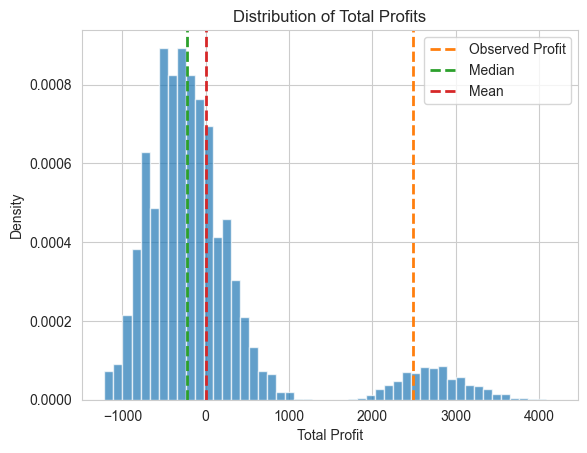

In [123]:
plt.hist(profit, bins=50, density=True, color='C0', alpha=0.7)
plt.title("Distribution of Total Profits")
plt.xlabel("Total Profit")
plt.ylabel("Density")

plt.axvline(observed_profit, color='C1', linestyle="dashed", linewidth=2, label='Observed Profit')
plt.axvline(median, color='C2', linestyle="dashed", linewidth=2, label='Median')
plt.axvline(mean, color='C3',  linestyle="dashed", linewidth=2, label='Mean')


plt.legend()
plt.show()

In [99]:
prob = np.sum(profit < observed_profit) / n_trials
prob

np.float64(0.94147)

### Answer

#### Interpretation from the simulation and sample data
1. In the 4th bet, the player placed the highest stake $250 at Odds 12.0. This might contribute to the fat tail in the right. 
2. From the simulation, the player **does not** have a clear edge against the bookmaker. The mean profit is very close to zero and the return on bets is < 1% even if he wins. 
3. The observed profit is at 94 percentile. So he is rather lucky this time. 

#### Interpretation from statistical analysis

I also calculated the Expected Value of profit using the player's stakes in this sheet / excel. 

https://docs.google.com/spreadsheets/d/1p8UyqltXb56toM6tDNE-4HY_L9M-Ks5RpNY09S_bBP0/edit?usp=sharing

* Assume bookmaker's implied probabilities are true probabilities, 

 * and without making any assumption of the distribution of the profits, 

the profit has a mean of almost 0 and standard deviation of 924. 

The observed profit $2483.45 from the player has a z-score of 2.68, it **appears** to be very good

However, as the samples have only 10 observations and the player won the yolo-bet (4th bet). So we might have just p-hacked. 

### Take 2

another look at binomial distribution

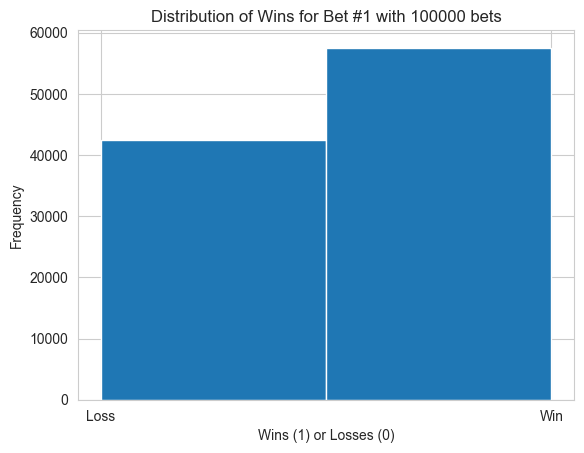

In [9]:
odd1 = 1.74
prob1 = 1 / odd1
stake = 1
num_simulations = 100000

b1 = np.random.binomial(1, prob1, size=100000)
plt.hist(b1, bins=2, color='C0')

plt.xticks([0, 1], ['Loss', 'Win'])
plt.title(f"Distribution of Wins for Bet #1 with {num_simulations} bets")
plt.xlabel("Wins (1) or Losses (0)")
plt.ylabel("Frequency")
plt.show()

In [4]:
print(f"Probability of winning bet #1: {prob1:.2f}")
print(f"Expected number of wins in {num_simulations} bets: {np.sum(b1)}")

Probability of winning bet #1: 0.57
Expected number of wins in 100000 bets: 57453


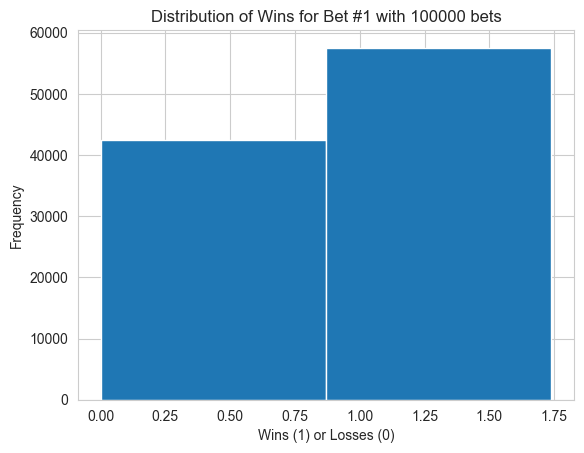

In [ ]:
payouts = b1 * odd1 * stake
payouts

plt.hist(payouts, bins=2, color='C0')

plt.title(f"Distribution of Payout for Bet #1 with {num_simulations} bets")
plt.xlabel("Wins (1) or Losses (0)")
plt.ylabel("Frequency")
plt.show()


In [13]:
mean_payout = np.mean(payouts)
print(f"Mean payout for Bet #1: {mean_payout:.2f}")

Mean payout for Bet #1: 1.00


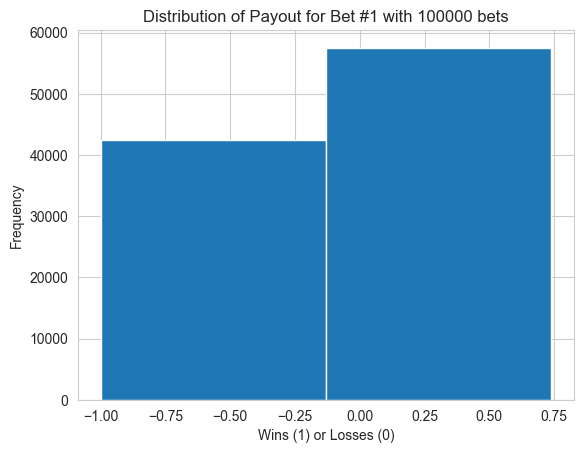

In [17]:

profits = payouts - stake

plt.hist(profits, bins=2, color='C0')

plt.title(f"Distribution of Payout for Bet #1 with {num_simulations} bets")
plt.xlabel("Wins (1) or Losses (0)")
plt.ylabel("Frequency")
plt.show()

In [18]:
mean_profit = np.mean(profits)
print(f"Mean of profit for Bet #1: {mean_profit:.2f}")

Mean of profit for Bet #1: 0.00


This distribution of the outcomes of the bets $P_{outcome}(X)$, win or lose, is a Bernouli Trial. 

$P_{o}(X= 0) = 0.43 $

$P_{o}(X= 1) = 0.57 $

The distribution of profit of the bet, given the stake is at $1, $P_{profit}(X)$, is 

$P_{f}(X = 0) = 0.43$

$P_{f}(X= 1) = 0.57 $




Suppose we have a 100 samples of the bet, 

1. What would the mean and variance of the number of wins be?
2. What would the mean and variance of the profit be?

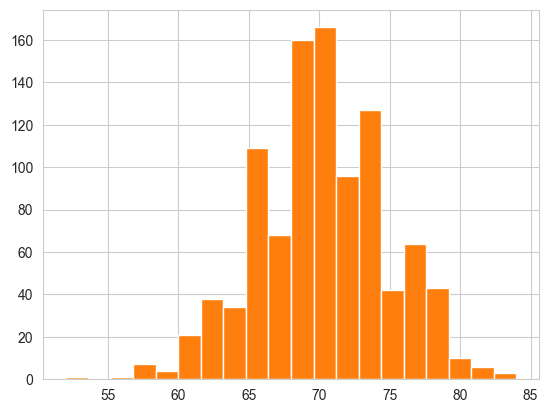

In [47]:
b2 = np.random.binomial(100, 0.7, size=1000)
plt.hist(b2, bins=20, color='C1')
plt.show()